In [1]:
from almanac.strategy.strategy25 import Strategy25
from almanac.dynamic_optimization.dyn_opt import greedy_algo_across_integer_values
from almanac.dynamic_optimization.dyn_opt_with_costs_and_buffering import greedy_algo_across_integer_values_with_costs_and_buffering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Strategy 4

Calculating covariance - can take a while


/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-pac

Portfolio Turnover: nan
[*********************100%***********************]  1 of 1 completed


                            Benchmark    Strategy
--------------------------  -----------  ----------
Start Period                1970-02-05   1970-02-05
End Period                  2022-12-30   2022-12-30
Risk-Free Rate              0.0%         0.0%
Time in Market              93.0%        98.0%

Cumulative Return           5,003.68%    52.41%
Pre-Cost Cumulative Return  -            89.03%
Active Return               0.0%         -4951.27%
CAGR﹪                      5.26%        0.55%

Post-cost Sharpe            0.5          0.35
Pre-Cost Sharpe             -            0.52
Cost in Sharpe              -            0.17
Prob. Sharpe Ratio          99.99%       99.58%
Smart Sharpe                0.49         0.34
Sortino                     0.7          0.5
Smart Sortino               0.69         0.49
Sortino/√2                  0.5          0.35
Smart Sortino/√2            0.49         0.35
Omega                       1.07         1.07

Max Drawdown                -56.78%      -15

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-11-08  2022-12-28  2022-12-30   418    -15.671400        -15.259551
2  2013-05-10  2016-01-20  2017-02-21  1384     -6.409069         -5.737047
3  1980-07-09  1986-07-25  1991-10-30  4131     -6.128818         -5.524618
4  2017-11-08  2018-12-25  2019-04-08   517     -4.747307         -4.419381
5  2020-02-24  2020-03-20  2020-05-31    98     -4.708164         -4.593552

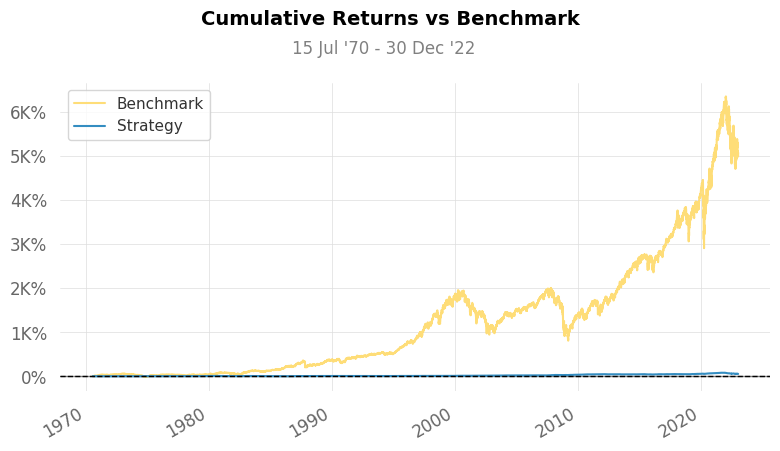

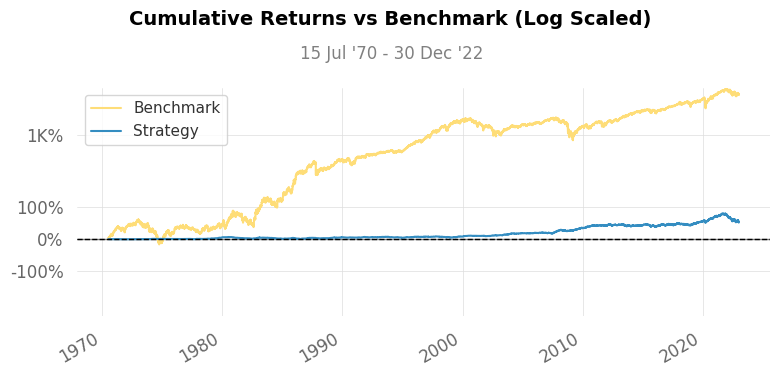

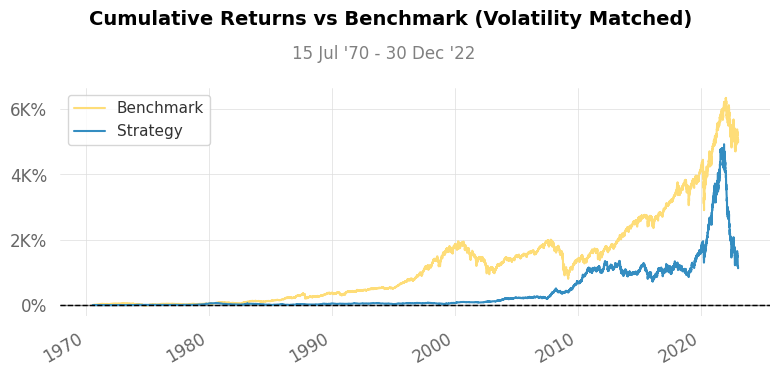

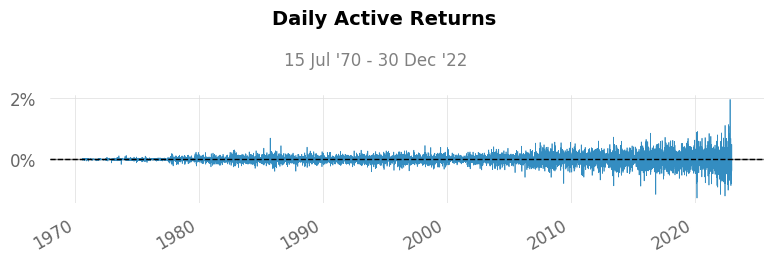

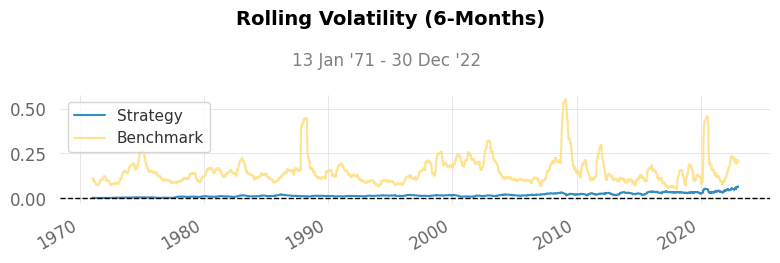

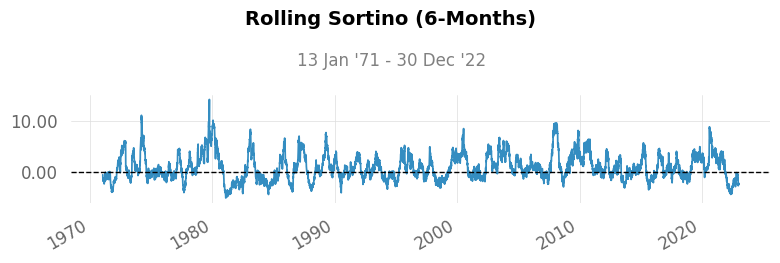

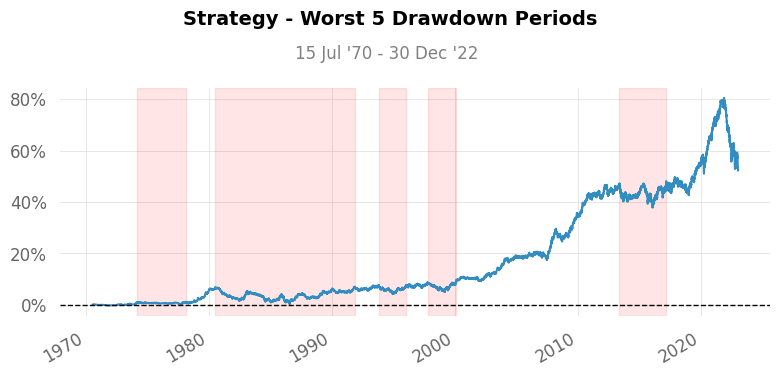

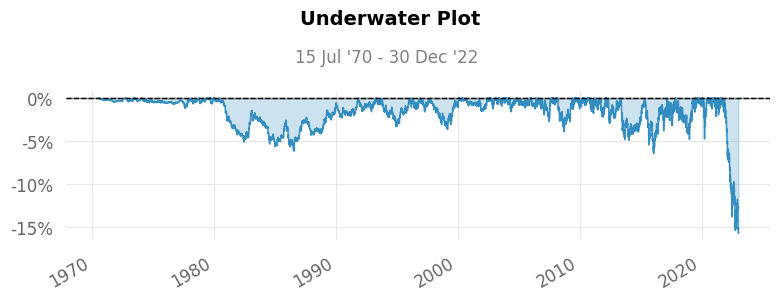

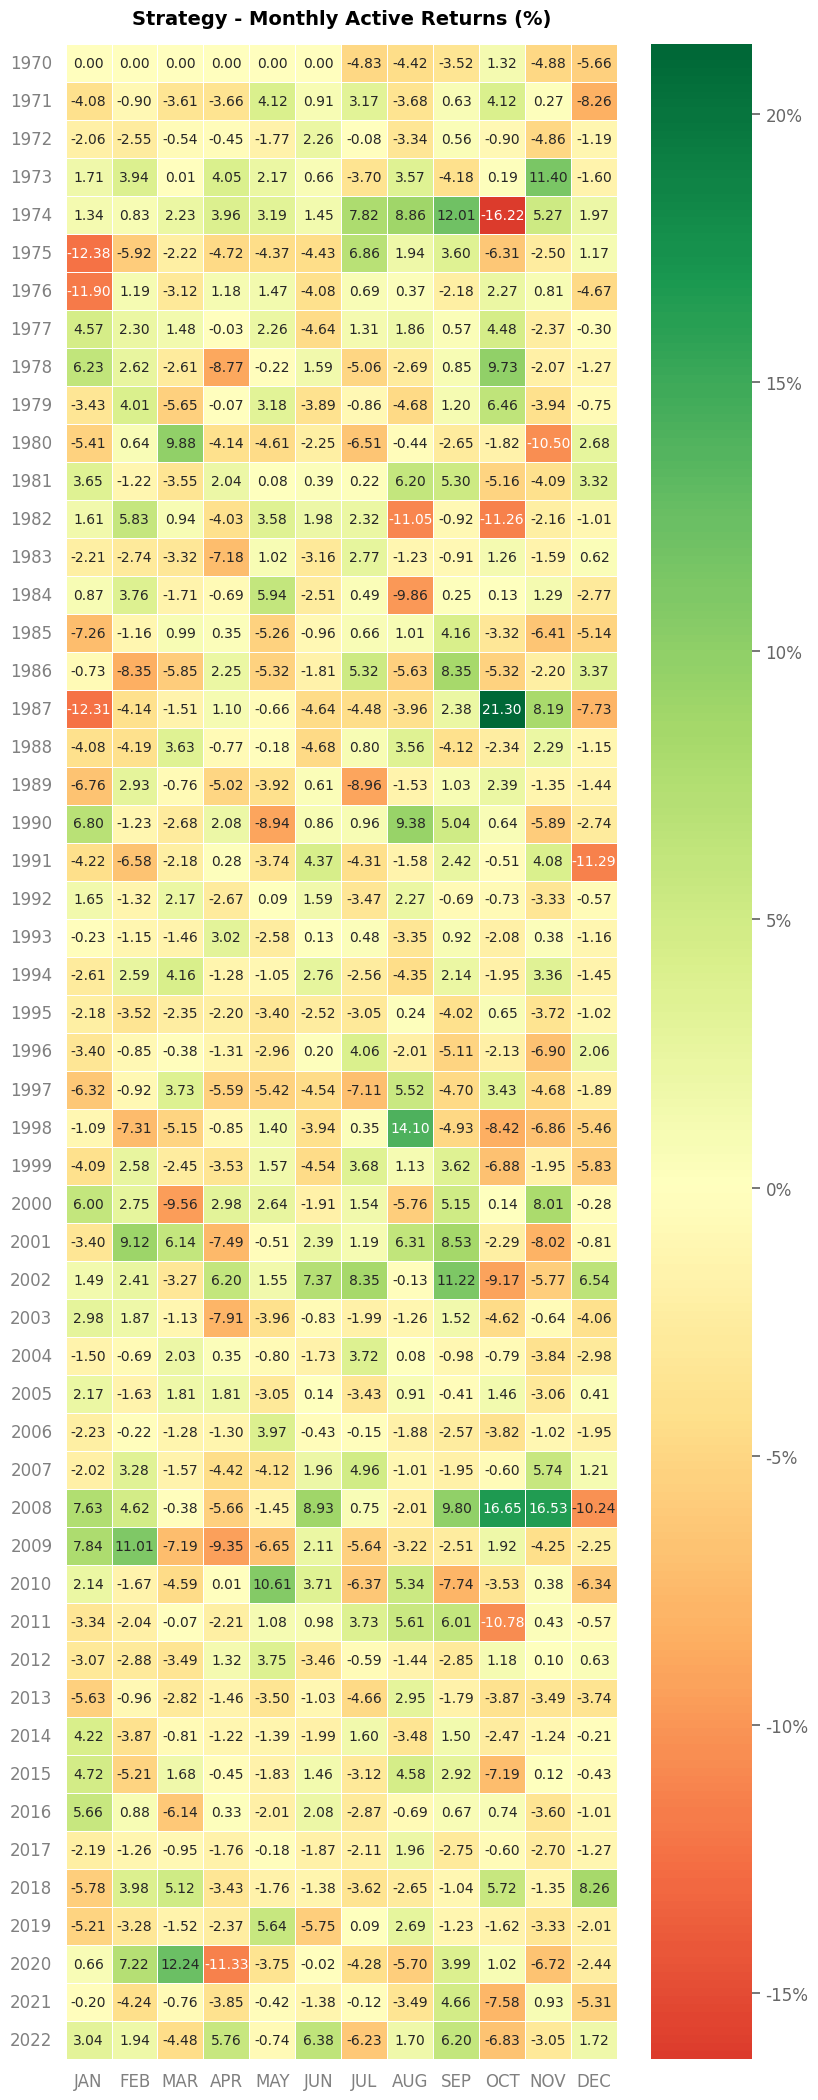

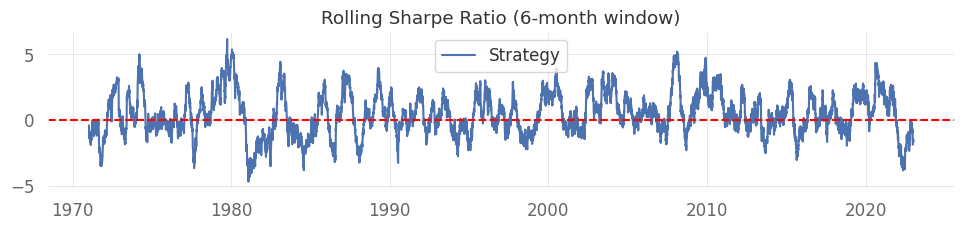

In [14]:
from almanac.strategy.strategy4 import Strategy4
from almanac.config.instruments import (
    INSTRUMENT_LIST,
    instrument_weights,
    multipliers,
    cost_per_contract_dict,
)
capital = 500000
idm = 1
risk_target = 0.2

strategy4_instance = Strategy4(
    data_path="../sample_data/jumbo/",
    fx_path="../sample_data/fx_data/",
    instrument_list=INSTRUMENT_LIST,
    instrument_weights=instrument_weights,
    multipliers=multipliers,
    idm=idm,
    risk_target=risk_target,
    cost_per_contract_dict=cost_per_contract_dict,
    capital=capital,
    use_buffer=True,
    get_carry=False,
)
strat4_positions = strategy4_instance.run_strategy(
    show_stats=False, return_positions=True
)

optimizer = Strategy25(
    data_path="../sample_data/jumbo/",
    carry_path="../sample_data/jumbo_carry/",
    fx_path="../sample_data/fx_data/",
    instrument_list=INSTRUMENT_LIST,
    instrument_weights=instrument_weights,
    multipliers=multipliers,
    idm=idm,
    risk_target=risk_target,
    capital=capital,
    cost_per_contract_dict=cost_per_contract_dict,
    use_buffer=False,
    get_carry=False,
    algo_to_use=greedy_algo_across_integer_values,
    unrounded_position_contracts_dict=strat4_positions,
)

optimized_positions_str4 = optimizer.run_strategy(return_position=True)

In [15]:
optimized_positions_df_str4 = pd.DataFrame(optimized_positions_str4)
non_zero_mask = (optimized_positions_df_str4 != 0).any()
columns_with_non_zero_values = optimized_positions_df_str4.columns[non_zero_mask]
print(f"Total Assets: {len(columns_with_non_zero_values)}")
columns_with_non_zero_values

Total Assets: 63


Index(['US2', 'US3', 'US5', 'US10', 'US20', 'US10U', 'SHATZ', 'BOBL', 'BUND',
       'BTP', 'BTP3', 'JGB', 'BONO', 'DOW', 'NASDAQ_micro', 'R1000',
       'SP500_micro', 'DAX', 'DJSTX-SMALL', 'EU-DIV30', 'EURO600', 'EUROSTX',
       'EU-AUTO', 'EU-BASIC', 'EU-HEALTH', 'EU-INSURE', 'EU-OIL', 'EU-TECH',
       'EU-UTILS', 'MSCIASIA', 'FTSECHINAA', 'NIFTY', 'NIKKEI', 'NIKKEI400',
       'MUMMY', 'TOPIX', 'MSCISING', 'VIX', 'V2X', 'AUD', 'CAD', 'CHF', 'JPY',
       'NZD', 'MXP', 'RUR', 'SGD', 'ALUMINIUM', 'COPPER', 'GOLD_micro', 'IRON',
       'PALLAD', 'PLAT', 'SILVER', 'BITCOIN', 'CRUDE_W_mini', 'GASOILINE',
       'GAS_US_mini', 'HEATOIL', 'BBCOMM', 'CHEESE', 'RICE', 'SOYMEAL'],
      dtype='object')

### Strategy 5

Calculating covariance - can take a while


/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-pac

Portfolio Turnover: nan
[*********************100%***********************]  1 of 1 completed


                            Benchmark    Strategy
--------------------------  -----------  -----------
Start Period                1970-02-05   1970-02-05
End Period                  2022-12-30   2022-12-30
Risk-Free Rate              0.0%         0.0%
Time in Market              93.0%        86.0%

Cumulative Return           4,842.08%    60.13%
Pre-Cost Cumulative Return  -            86.15%
Active Return               0.0%         -4781.95%
CAGR﹪                      5.22%        0.62%

Post-cost Sharpe            0.5          0.49
Pre-Cost Sharpe             -            0.64
Cost in Sharpe              -            0.15
Prob. Sharpe Ratio          99.99%       99.99%
Smart Sharpe                0.46         0.46
Sortino                     0.7          0.7
Smart Sortino               0.65         0.65
Sortino/√2                  0.49         0.5
Smart Sortino/√2            0.46         0.46
Omega                       1.12         1.12

Max Drawdown                -56.78%      -11

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-08-06  2022-12-30  2022-12-30   512    -11.689122        -11.497901
2  2013-05-17  2018-11-08  2019-07-02  2238     -7.399311         -7.084395
3  2008-03-17  2008-08-22  2008-11-10   239     -3.030348         -2.932762
4  2012-03-28  2012-11-21  2013-04-28   397     -2.715031         -2.647381
5  2019-08-26  2019-10-14  2019-12-12   109     -2.602523         -2.600914

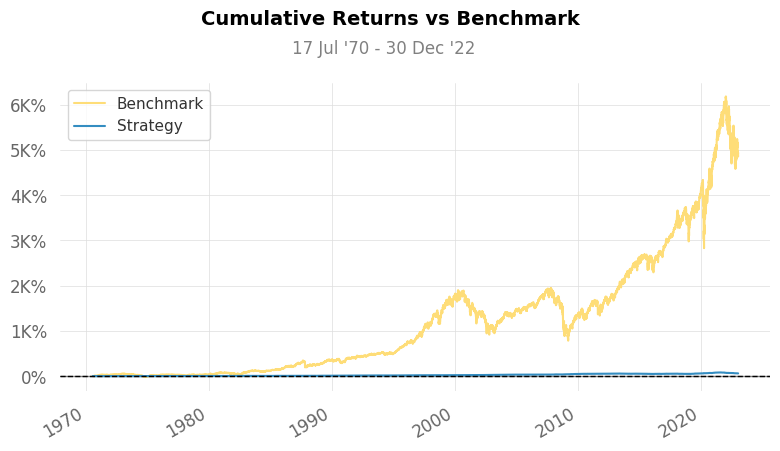

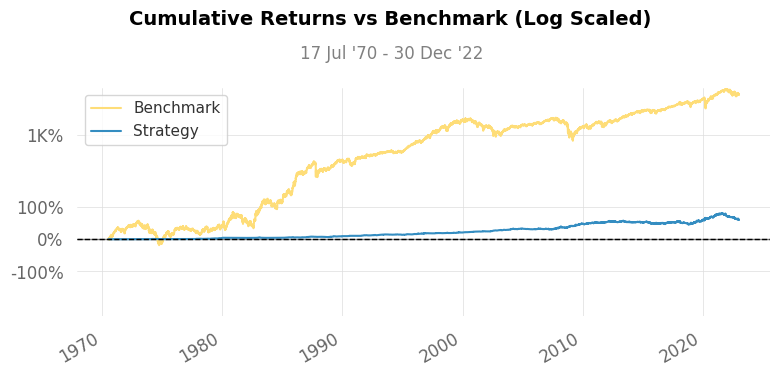

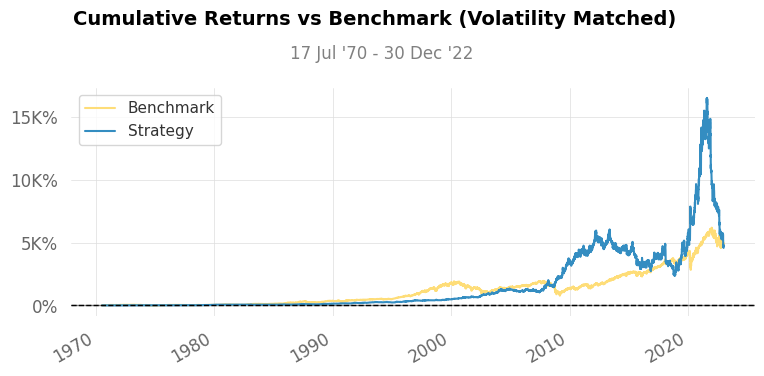

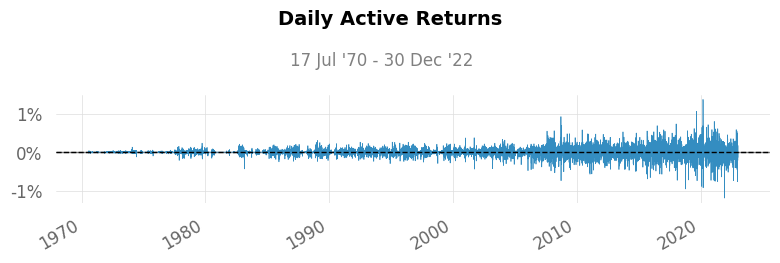

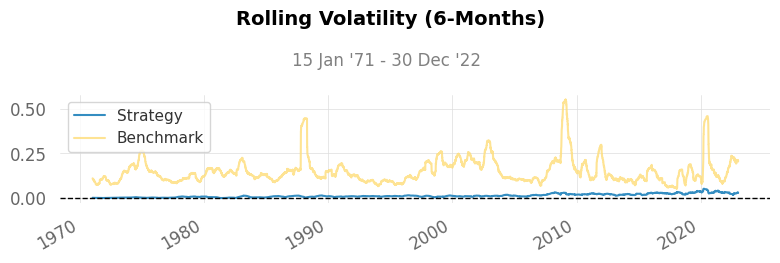

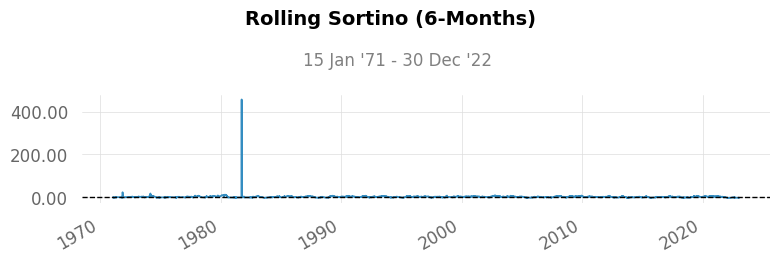

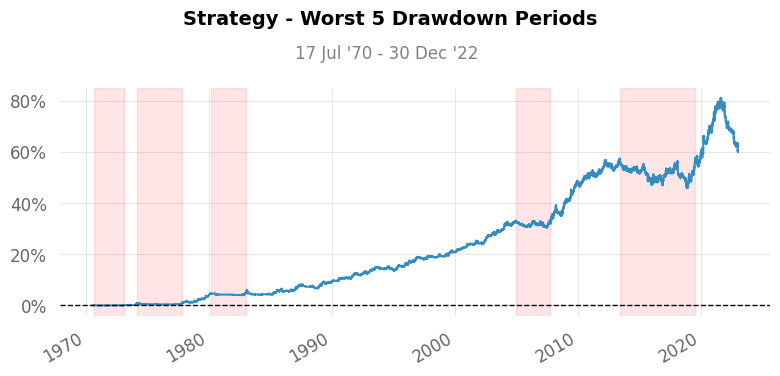

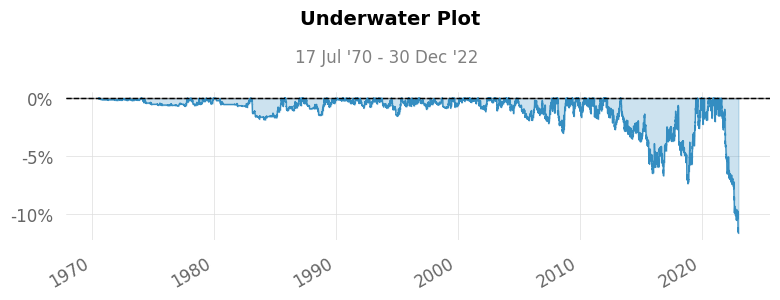

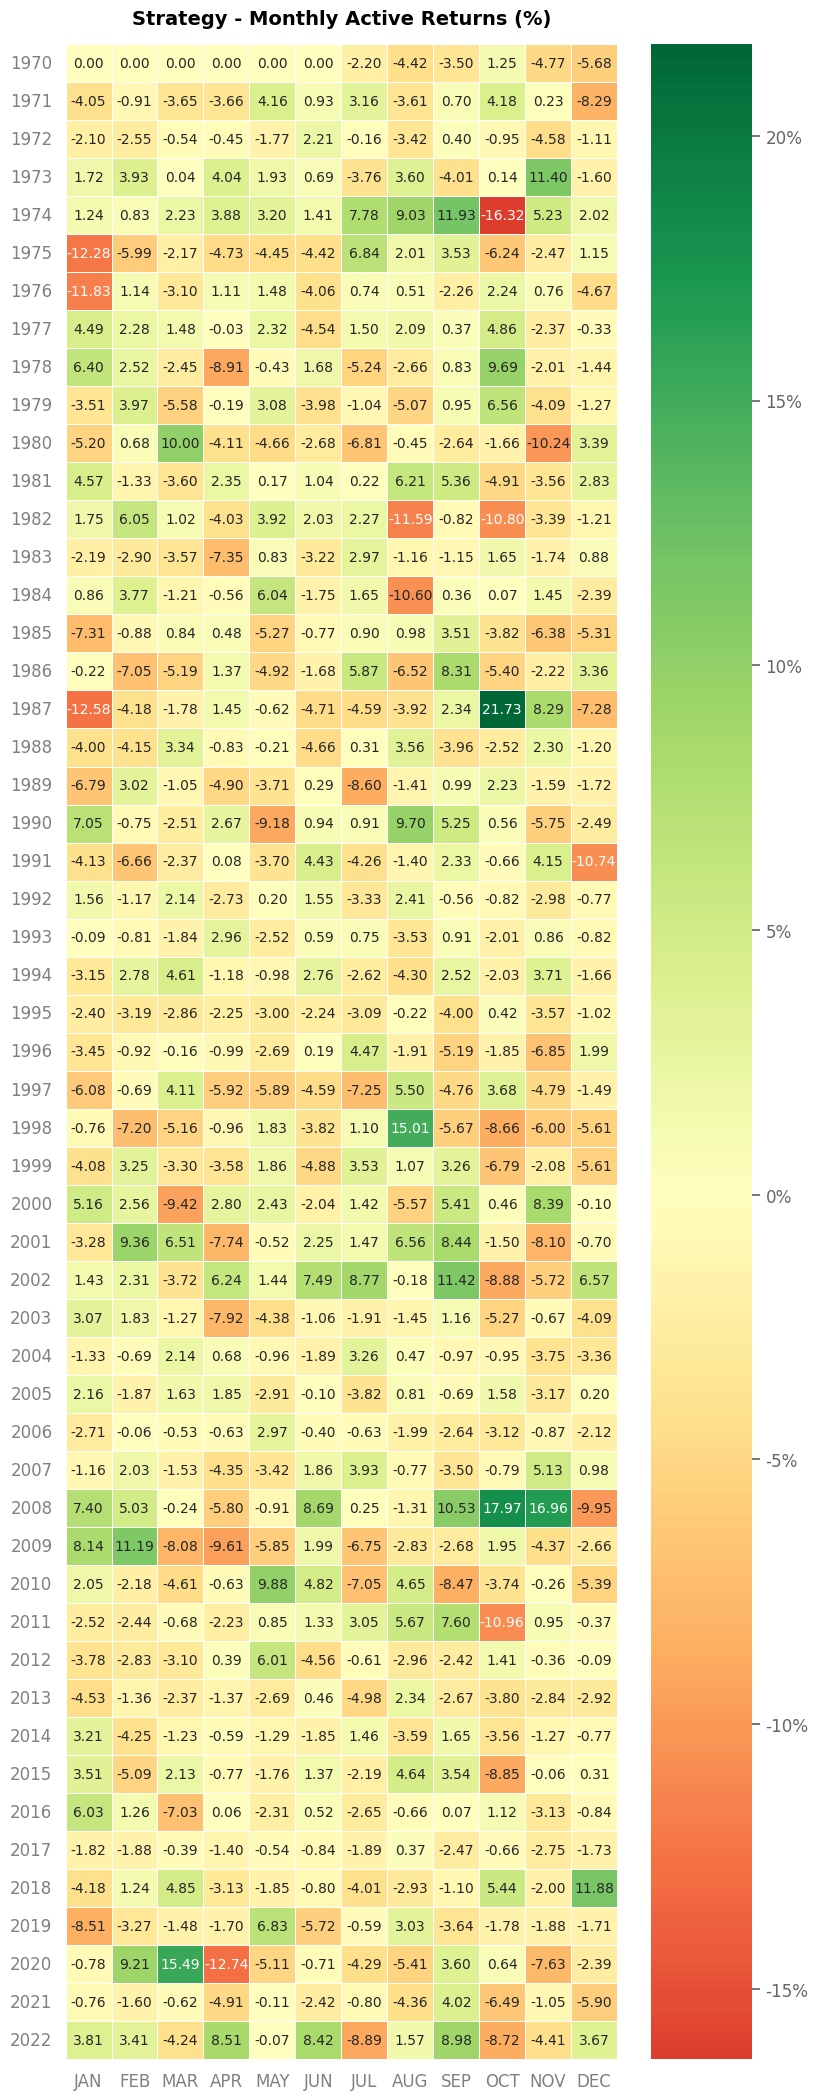

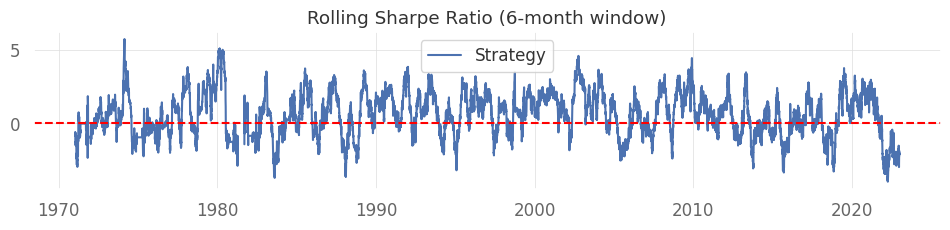

In [12]:
from almanac.strategy.strategy5 import Strategy5
from almanac.config.instruments import INSTRUMENT_LIST, instrument_weights, multipliers, cost_per_contract_dict
capital = 500000
idm = 1
risk_target = 0.2

strat = Strategy5(data_path='../sample_data/jumbo/',
                  fx_path='../sample_data/fx_data/',
                  instrument_list=INSTRUMENT_LIST,
                  instrument_weights=instrument_weights,
                  multipliers=multipliers,
                  idm=idm, risk_target=risk_target, capital=capital,
                  cost_per_contract_dict=cost_per_contract_dict,
                  use_buffer=False
                  )
strat5_positions = strat.run_strategy(show_stats=False, return_positions=True)
optimizer = Strategy25(
    data_path="../sample_data/jumbo/",
    carry_path="../sample_data/jumbo_carry/",
    fx_path="../sample_data/fx_data/",
    instrument_list=INSTRUMENT_LIST,
    instrument_weights=instrument_weights,
    multipliers=multipliers,
    idm=idm,
    risk_target=risk_target,
    capital=capital,
    cost_per_contract_dict=cost_per_contract_dict,
    use_buffer=False,
    get_carry=False,
    algo_to_use=greedy_algo_across_integer_values,
    unrounded_position_contracts_dict=strat5_positions,
)
optimized_positions_str5 = optimizer.run_strategy(return_position=True)

In [13]:
optimized_positions_df_str5 = pd.DataFrame(optimized_positions_str5)
non_zero_mask = (optimized_positions_df_str5 != 0).any()
columns_with_non_zero_values = optimized_positions_df_str5.columns[non_zero_mask]
print(f"Total Assets: {len(columns_with_non_zero_values)}")
columns_with_non_zero_values

Total Assets: 59


Index(['US2', 'US3', 'US5', 'US10', 'US20', 'US10U', 'SHATZ', 'BOBL', 'BUND',
       'BTP', 'BTP3', 'BONO', 'DOW', 'NASDAQ_micro', 'R1000', 'SP400',
       'SP500_micro', 'DAX', 'SMI', 'DJSTX-SMALL', 'EU-DIV30', 'EURO600',
       'EUROSTX', 'EU-AUTO', 'EU-BASIC', 'EU-HEALTH', 'EU-INSURE', 'EU-OIL',
       'EU-UTILS', 'FTSECHINAA', 'NIFTY', 'NIKKEI', 'NIKKEI400', 'MUMMY',
       'TOPIX', 'MSCISING', 'VIX', 'V2X', 'AUD', 'CAD', 'CHF', 'JPY', 'NZD',
       'MXP', 'RUR', 'SGD', 'GOLD_micro', 'IRON', 'PALLAD', 'PLAT', 'SILVER',
       'BITCOIN', 'CRUDE_W_mini', 'GASOILINE', 'GAS_US_mini', 'HEATOIL',
       'BBCOMM', 'RICE', 'SOYMEAL'],
      dtype='object')

### Strategy 6

Calculating covariance - can take a while


/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-pac

Portfolio Turnover: nan
[*********************100%***********************]  1 of 1 completed


                            Benchmark    Strategy
--------------------------  -----------  ----------
Start Period                1970-02-05   1970-02-05
End Period                  2022-12-30   2022-12-30
Risk-Free Rate              0.0%         0.0%
Time in Market              93.0%        96.0%

Cumulative Return           5,003.68%    37.59%
Pre-Cost Cumulative Return  -            85.99%
Active Return               0.0%         -4966.09%
CAGR﹪                      5.26%        0.42%

Post-cost Sharpe            0.5          0.21
Pre-Cost Sharpe             -            0.39
Cost in Sharpe              -            0.18
Prob. Sharpe Ratio          99.99%       94.43%
Smart Sharpe                0.44         0.18
Sortino                     0.7          0.3
Smart Sortino               0.61         0.26
Sortino/√2                  0.5          0.21
Smart Sortino/√2            0.43         0.19
Omega                       1.05         1.05

Max Drawdown                -56.78%      -16

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2020-03-24  2022-12-26  2022-12-30  1012    -16.480416        -16.132200
2  2012-06-03  2020-02-02  2020-03-13  2841    -13.730679        -12.633589
3  2011-10-04  2011-12-26  2012-05-29   239     -4.338130         -4.244375
4  2011-02-15  2011-04-18  2011-09-21   219     -3.624477         -3.557525
5  2010-07-01  2010-09-10  2010-11-03   126     -2.953013         -2.817596

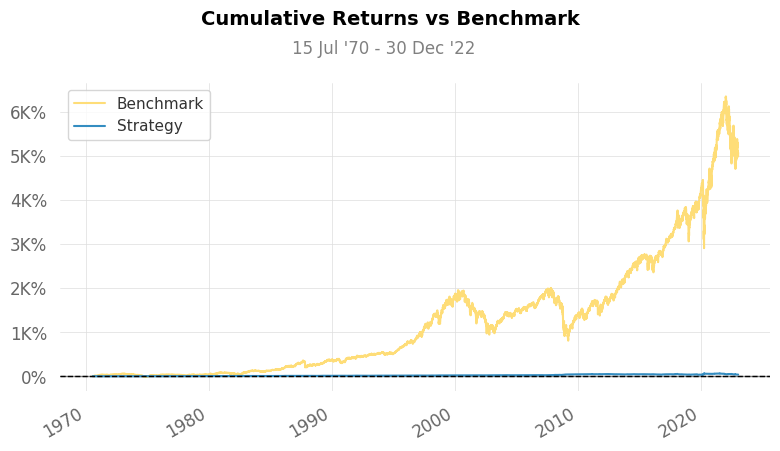

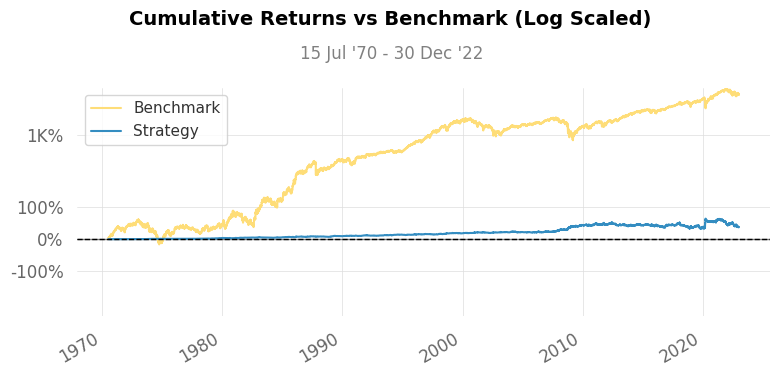

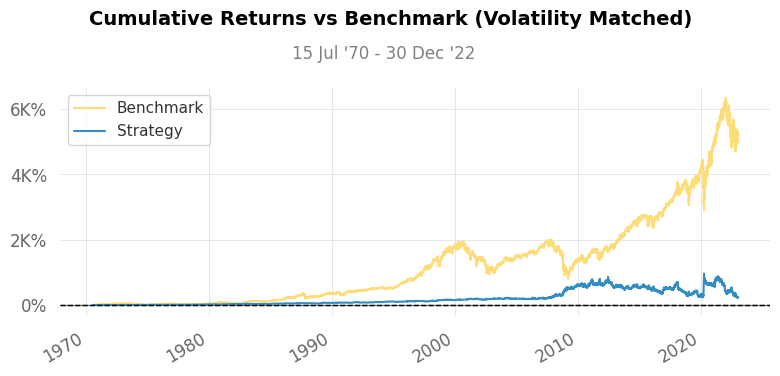

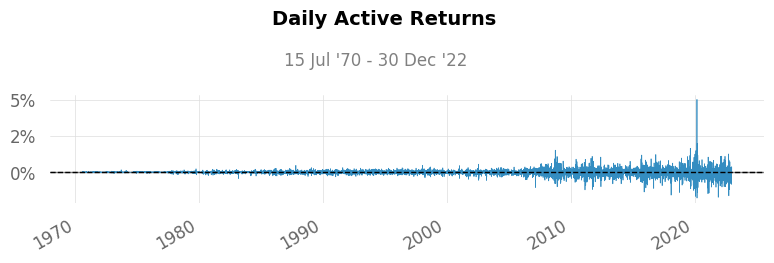

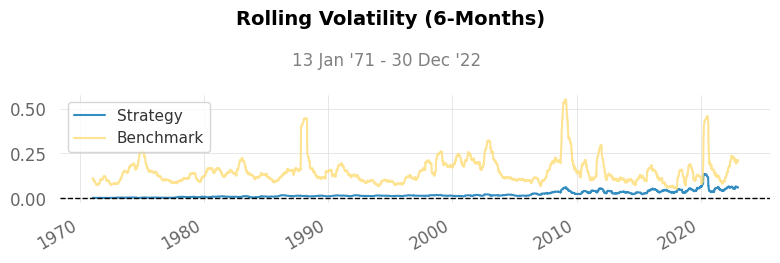

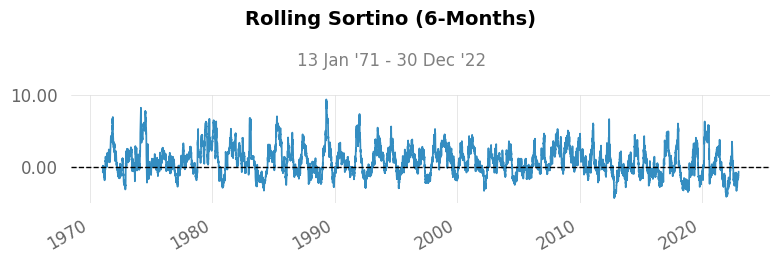

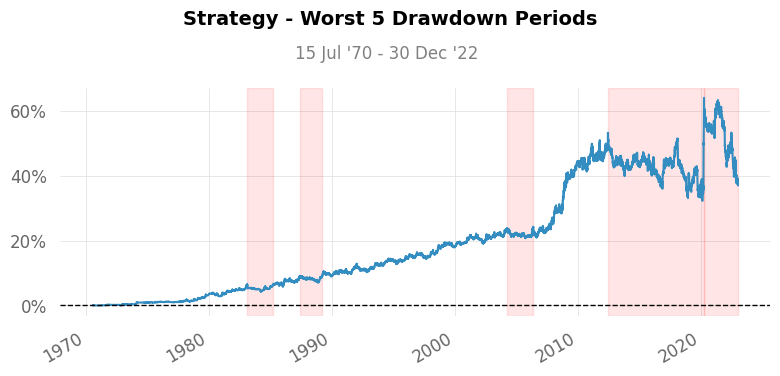

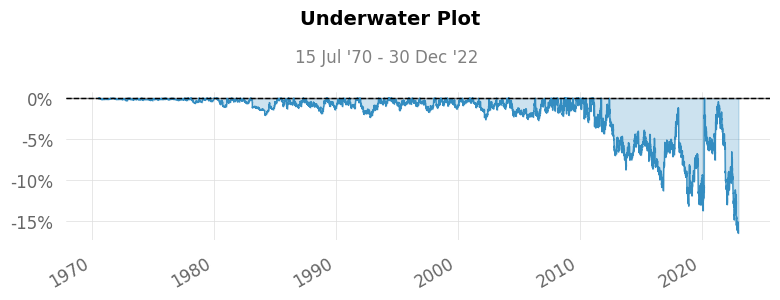

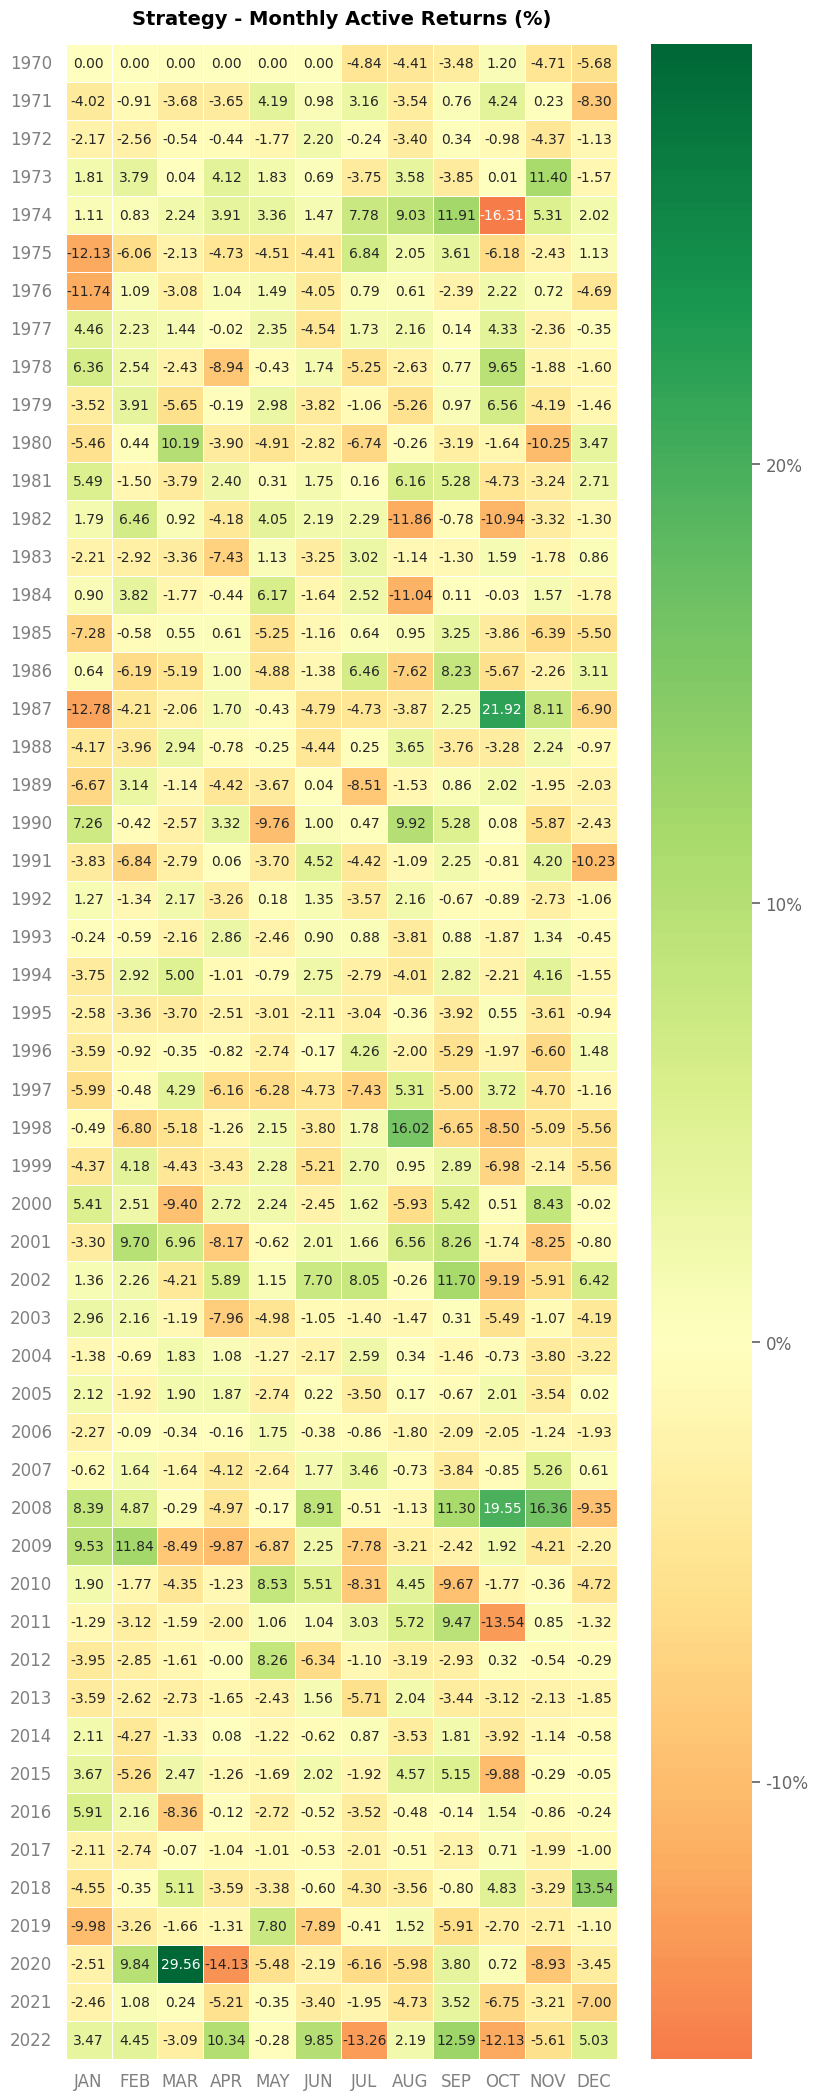

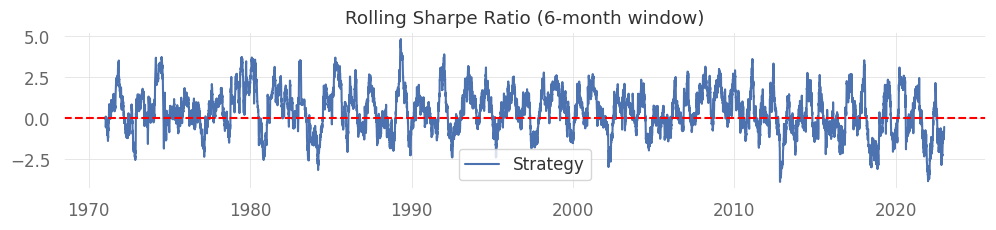

In [16]:
from almanac.strategy.strategy6 import Strategy6
from almanac.config.instruments import INSTRUMENT_LIST, instrument_weights, multipliers, cost_per_contract_dict
capital = 500000
idm = 1
risk_target = 0.2

strat = Strategy6(data_path='../sample_data/jumbo/',
                  fx_path='../sample_data/fx_data/',
                  instrument_list=INSTRUMENT_LIST,
                  instrument_weights=instrument_weights,
                  multipliers=multipliers,
                  idm=idm, risk_target=risk_target, capital=capital,
                  cost_per_contract_dict=cost_per_contract_dict,
                  get_carry=False
                  )
strat6_positions = strat.run_strategy(show_stats=False, return_positions=True)

optimizer = Strategy25(
    data_path="../sample_data/jumbo/",
    carry_path="../sample_data/jumbo_carry/",
    fx_path="../sample_data/fx_data/",
    instrument_list=INSTRUMENT_LIST,
    instrument_weights=instrument_weights,
    multipliers=multipliers,
    idm=idm,
    risk_target=risk_target,
    capital=capital,
    cost_per_contract_dict=cost_per_contract_dict,
    use_buffer=False,
    get_carry=False,
    algo_to_use=greedy_algo_across_integer_values,
    unrounded_position_contracts_dict=strat6_positions,
)

optimized_positions_str6 = optimizer.run_strategy(return_position=True)

In [17]:
optimized_positions_df_str6 = pd.DataFrame(optimized_positions_str6)
non_zero_mask = (optimized_positions_df_str6 != 0).any()
columns_with_non_zero_values = optimized_positions_df_str6.columns[non_zero_mask]
print(f"Total Assets: {len(columns_with_non_zero_values)}")
columns_with_non_zero_values

Total Assets: 68


Index(['US2', 'US3', 'US5', 'US10', 'US30', 'US20', 'US10U', 'SHATZ', 'BOBL',
       'BUND', 'BTP', 'BTP3', 'JGB', 'BONO', 'DOW', 'NASDAQ_micro', 'R1000',
       'SP400', 'SP500_micro', 'AEX', 'DAX', 'SMI', 'DJSTX-SMALL', 'EU-DIV30',
       'EURO600', 'EUROSTX', 'EU-AUTO', 'EU-BASIC', 'EU-HEALTH', 'EU-INSURE',
       'EU-OIL', 'EU-TECH', 'EU-UTILS', 'MSCIASIA', 'FTSECHINAA', 'NIFTY',
       'NIKKEI', 'NIKKEI400', 'MUMMY', 'TOPIX', 'MSCISING', 'VIX', 'V2X',
       'AUD', 'CAD', 'CHF', 'EUR', 'JPY', 'NZD', 'MXP', 'RUR', 'SGD',
       'ALUMINIUM', 'GOLD_micro', 'IRON', 'PALLAD', 'PLAT', 'SILVER',
       'BITCOIN', 'BRENT-LAST', 'CRUDE_W_mini', 'GASOILINE', 'GAS_US_mini',
       'HEATOIL', 'BBCOMM', 'CHEESE', 'RICE', 'SOYMEAL'],
      dtype='object')

### Strategy 7

Calculating covariance - can take a while


/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-pac

Portfolio Turnover: nan
[*********************100%***********************]  1 of 1 completed


                            Benchmark    Strategy
--------------------------  -----------  ----------
Start Period                1970-02-05   1970-02-05
End Period                  2022-12-30   2022-12-30
Risk-Free Rate              0.0%         0.0%
Time in Market              92.0%        93.0%

Cumulative Return           4,885.07%    117.48%
Pre-Cost Cumulative Return  -            164.11%
Active Return               0.0%         -4767.59%
CAGR﹪                      5.23%        1.02%

Post-cost Sharpe            0.5          0.44
Pre-Cost Sharpe             -            0.55
Cost in Sharpe              -            0.11
Prob. Sharpe Ratio          99.99%       99.95%
Smart Sharpe                0.44         0.39
Sortino                     0.7          0.61
Smart Sortino               0.62         0.54
Sortino/√2                  0.5          0.43
Smart Sortino/√2            0.44         0.38
Omega                       1.11         1.11

Max Drawdown                -56.78%      

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2018-01-23  2019-03-03  2022-09-19  1701    -14.559837        -13.705663
2  2009-02-24  2009-08-07  2013-03-24  1490    -13.218657        -12.445980
3  2022-10-22  2022-12-07  2022-12-30    70     -9.597100         -9.128151
4  2015-05-29  2016-03-22  2017-04-23   696     -6.401941         -6.234408
5  2008-03-17  2008-08-15  2008-11-30   259     -5.418496         -5.274171

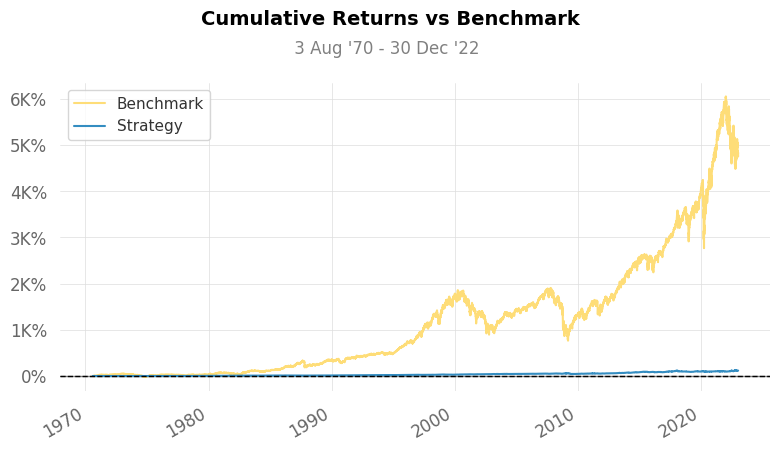

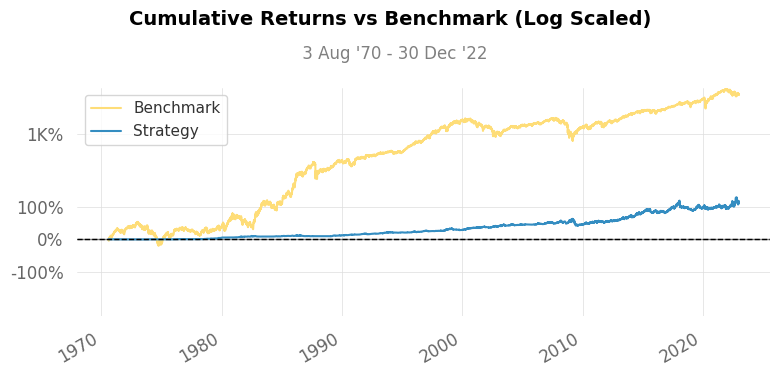

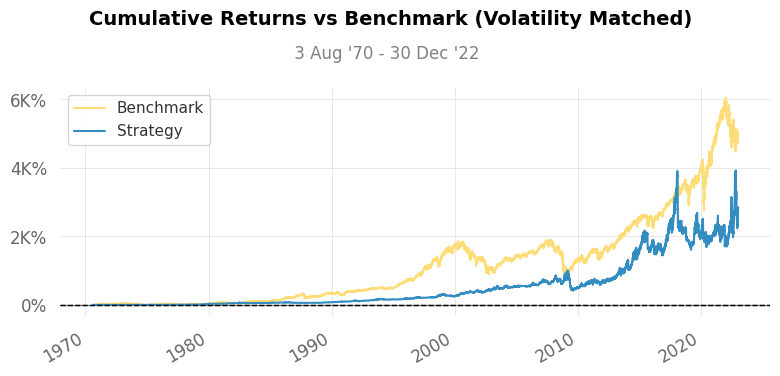

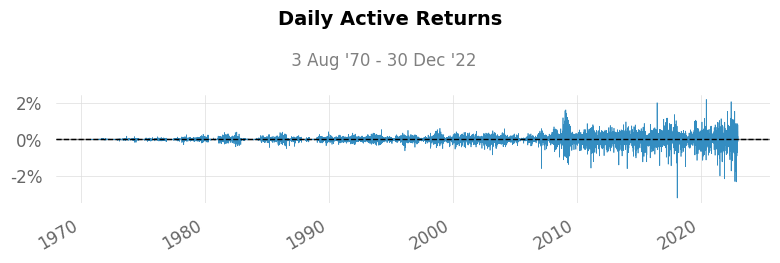

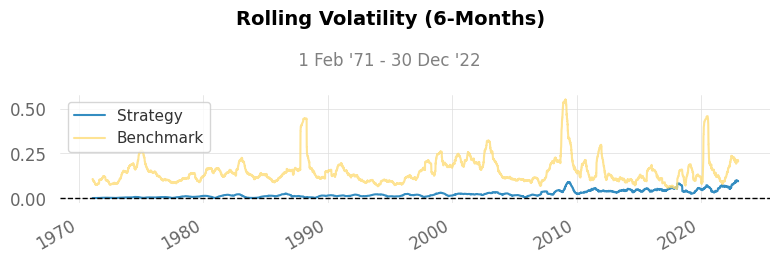

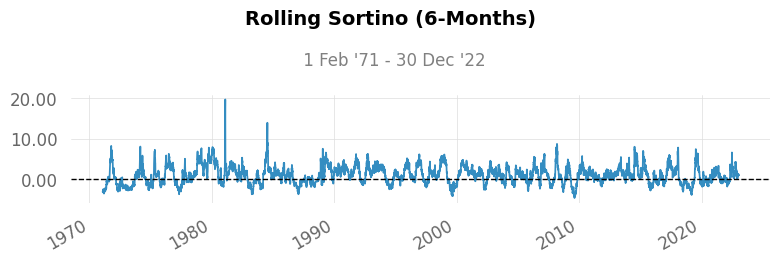

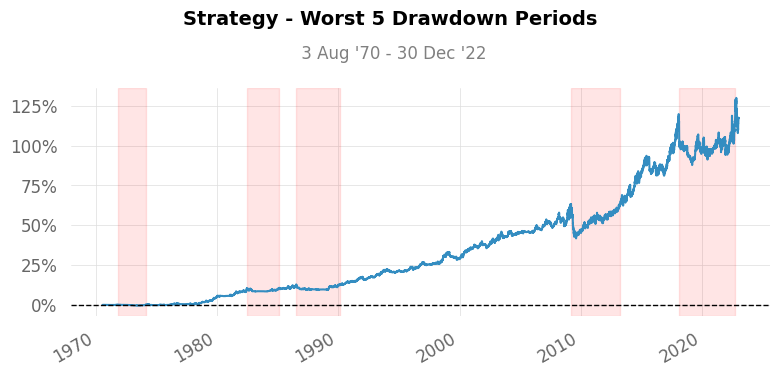

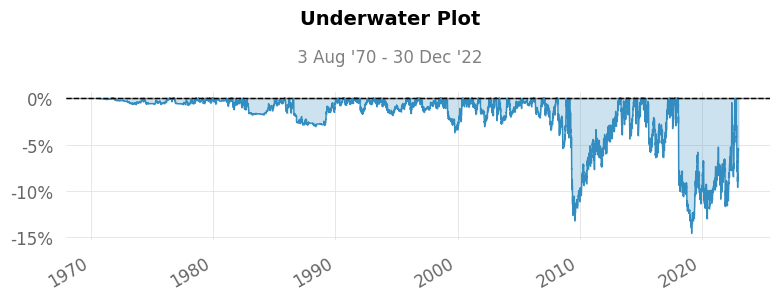

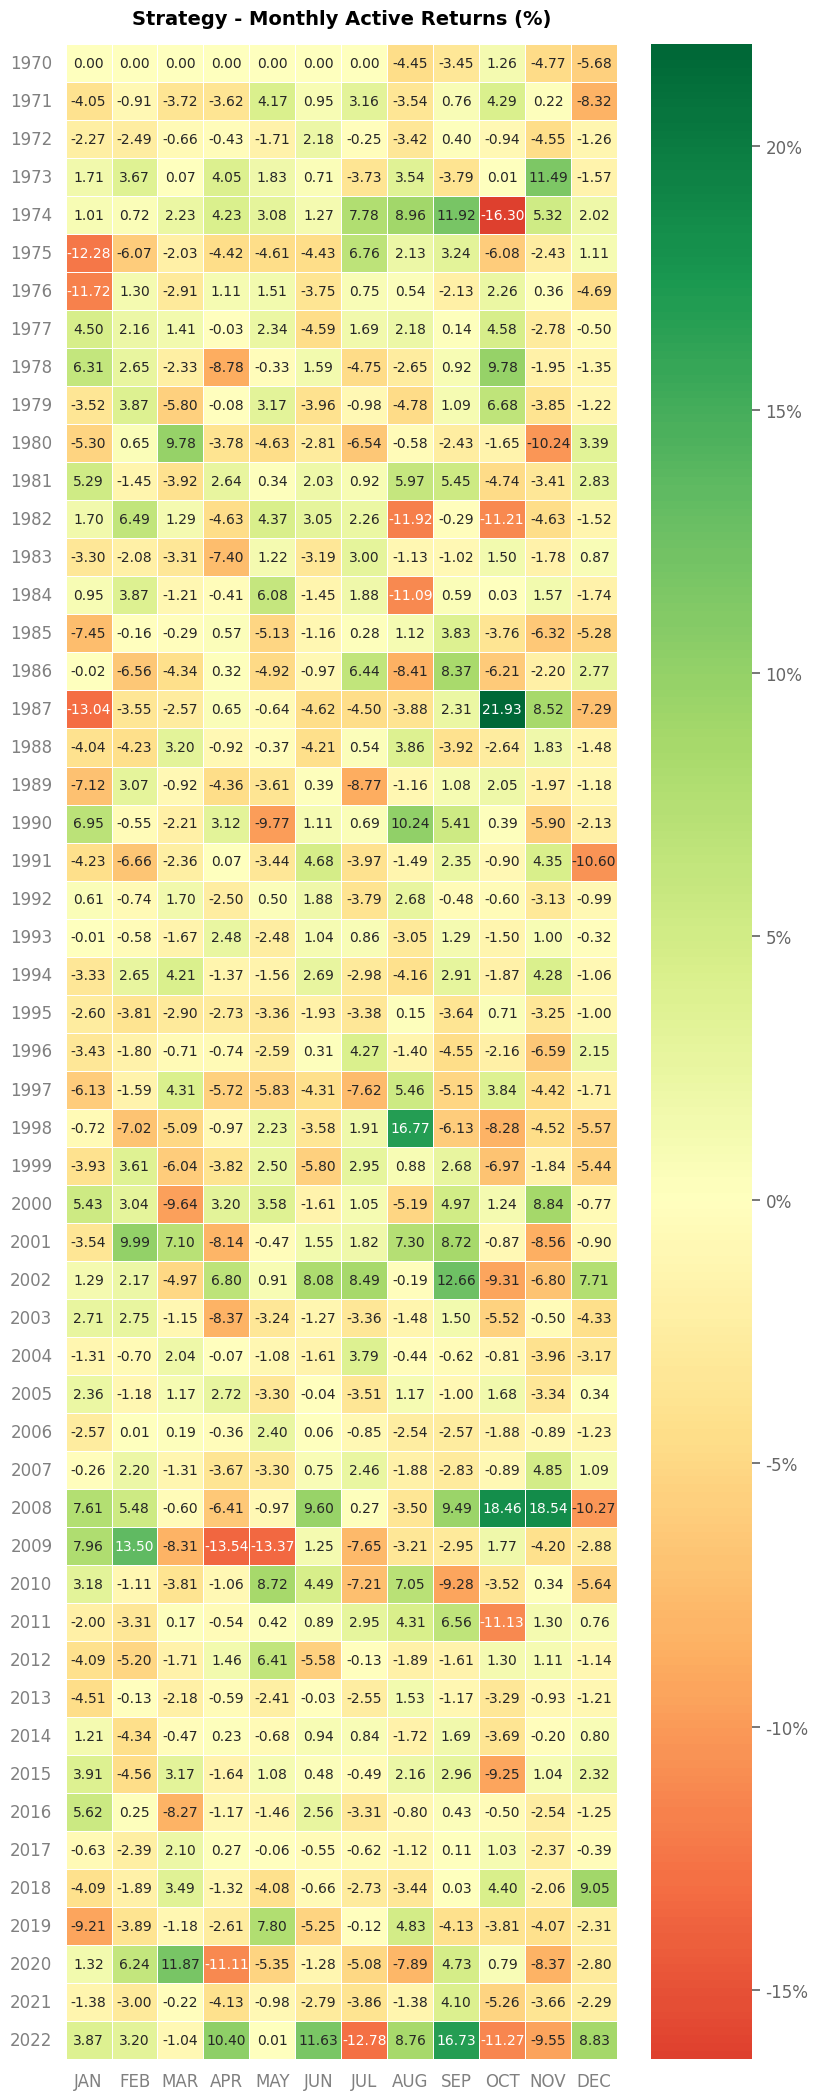

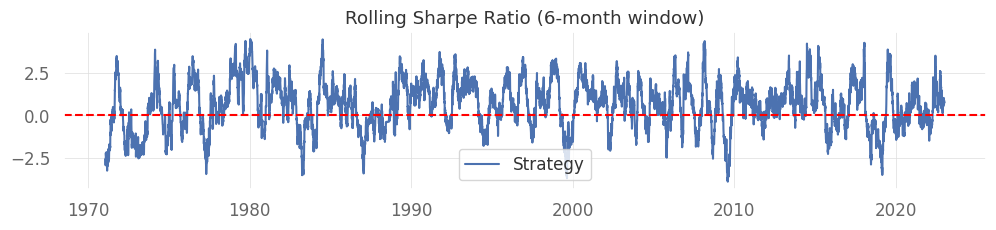

In [18]:
from almanac.strategy.strategy7 import Strategy7
from almanac.config.instruments import INSTRUMENT_LIST, instrument_weights, multipliers, cost_per_contract_dict
capital = 500000
idm = 1
risk_target = 0.2

strat = Strategy7(data_path='../sample_data/jumbo/',
                  fx_path='../sample_data/fx_data/',
                  instrument_list=INSTRUMENT_LIST,
                  instrument_weights=instrument_weights,
                  multipliers=multipliers,
                  idm=idm, risk_target=risk_target, capital=capital,
                  cost_per_contract_dict=cost_per_contract_dict,
                  get_carry=False
                  )
strat7_positions = strat.run_strategy(show_stats=False, return_positions=True)

optimizer = Strategy25(
    data_path="../sample_data/jumbo/",
    carry_path="../sample_data/jumbo_carry/",
    fx_path="../sample_data/fx_data/",
    instrument_list=INSTRUMENT_LIST,
    instrument_weights=instrument_weights,
    multipliers=multipliers,
    idm=idm,
    risk_target=risk_target,
    capital=capital,
    cost_per_contract_dict=cost_per_contract_dict,
    use_buffer=False,
    get_carry=False,
    algo_to_use=greedy_algo_across_integer_values,
    unrounded_position_contracts_dict=strat7_positions,
)

optimized_positions_str7 = optimizer.run_strategy(return_position=True)

In [19]:
optimized_positions_df_str7 = pd.DataFrame(optimized_positions_str7)
non_zero_mask = (optimized_positions_df_str7 != 0).any()
columns_with_non_zero_values = optimized_positions_df_str7.columns[non_zero_mask]
print(f"Total Assets: {len(columns_with_non_zero_values)}")
columns_with_non_zero_values

Total Assets: 67


Index(['US2', 'US3', 'US5', 'US10', 'US20', 'US10U', 'SHATZ', 'BOBL', 'BUND',
       'BUXL', 'BTP', 'BTP3', 'JGB', 'BONO', 'DOW', 'NASDAQ_micro', 'R1000',
       'SP400', 'SP500_micro', 'AEX', 'DAX', 'SMI', 'DJSTX-SMALL', 'EU-DIV30',
       'EURO600', 'EUROSTX', 'EU-AUTO', 'EU-BASIC', 'EU-HEALTH', 'EU-INSURE',
       'EU-OIL', 'EU-TECH', 'EU-UTILS', 'FTSECHINAA', 'NIFTY', 'NIKKEI',
       'NIKKEI400', 'MUMMY', 'TOPIX', 'MSCISING', 'VIX', 'V2X', 'AUD', 'CAD',
       'CHF', 'EUR', 'JPY', 'NZD', 'MXP', 'RUR', 'SGD', 'ALUMINIUM', 'COPPER',
       'GOLD_micro', 'IRON', 'PALLAD', 'PLAT', 'SILVER', 'BITCOIN',
       'CRUDE_W_mini', 'GASOILINE', 'GAS_US_mini', 'HEATOIL', 'BBCOMM',
       'CHEESE', 'RICE', 'SOYMEAL'],
      dtype='object')

### Strategy 8

Calculating covariance - can take a while


/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-pac

Portfolio Turnover: nan
[*********************100%***********************]  1 of 1 completed


                            Benchmark    Strategy
--------------------------  -----------  ----------
Start Period                1970-02-05   1970-02-05
End Period                  2022-12-30   2022-12-30
Risk-Free Rate              0.0%         0.0%
Time in Market              92.0%        93.0%

Cumulative Return           4,885.07%    117.48%
Pre-Cost Cumulative Return  -            164.11%
Active Return               0.0%         -4767.59%
CAGR﹪                      5.23%        1.02%

Post-cost Sharpe            0.5          0.44
Pre-Cost Sharpe             -            0.55
Cost in Sharpe              -            0.11
Prob. Sharpe Ratio          99.99%       99.95%
Smart Sharpe                0.44         0.39
Sortino                     0.7          0.61
Smart Sortino               0.62         0.54
Sortino/√2                  0.5          0.43
Smart Sortino/√2            0.44         0.38
Omega                       1.11         1.11

Max Drawdown                -56.78%      

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2018-01-23  2019-03-03  2022-09-19  1701    -14.559837        -13.705663
2  2009-02-24  2009-08-07  2013-03-24  1490    -13.218657        -12.445980
3  2022-10-22  2022-12-07  2022-12-30    70     -9.597100         -9.128151
4  2015-05-29  2016-03-22  2017-04-23   696     -6.401941         -6.234408
5  2008-03-17  2008-08-15  2008-11-30   259     -5.418496         -5.274171

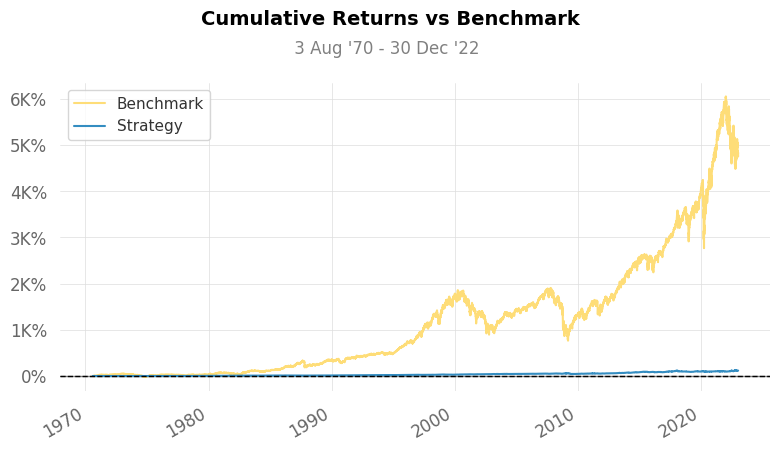

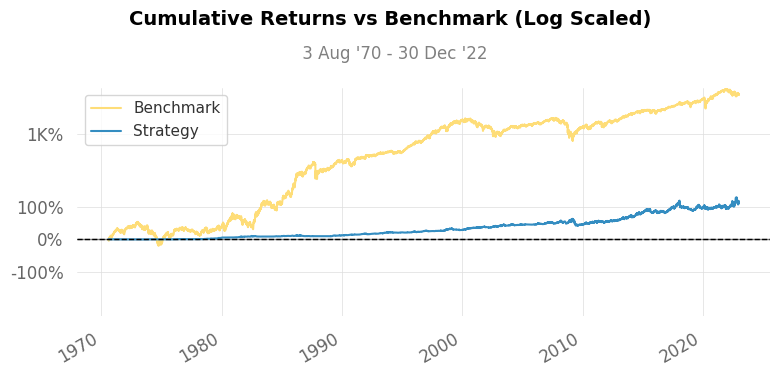

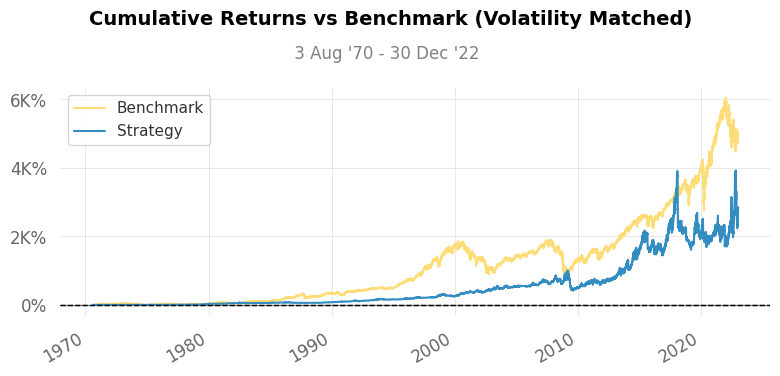

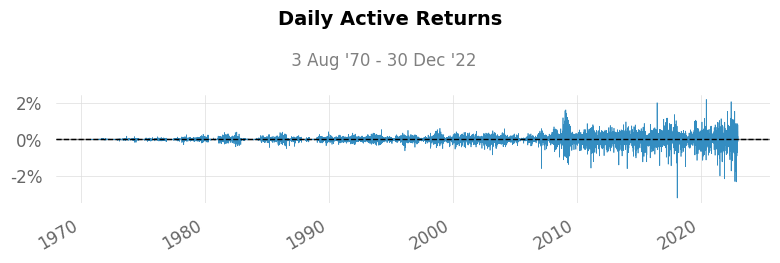

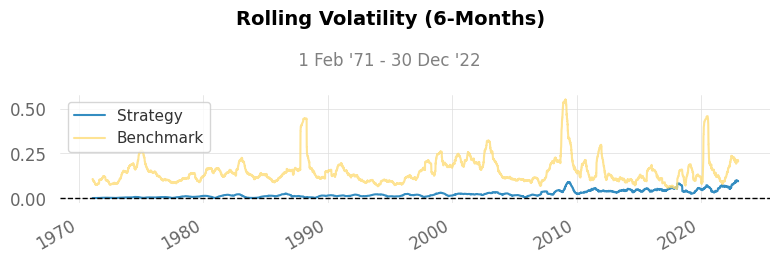

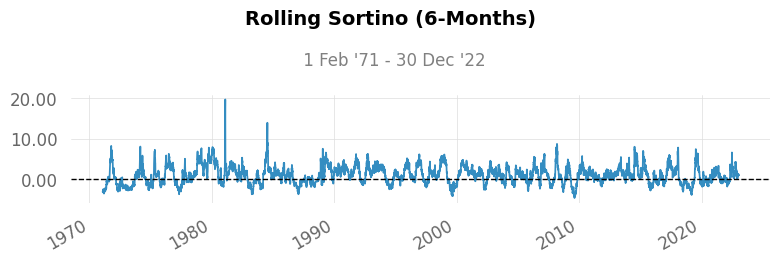

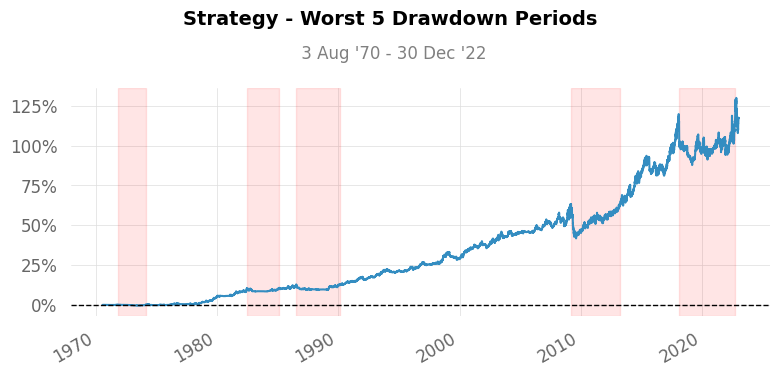

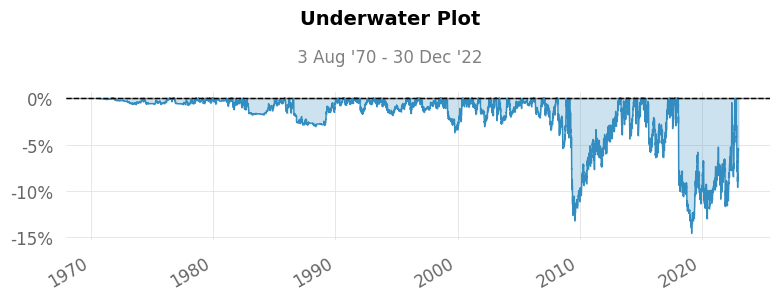

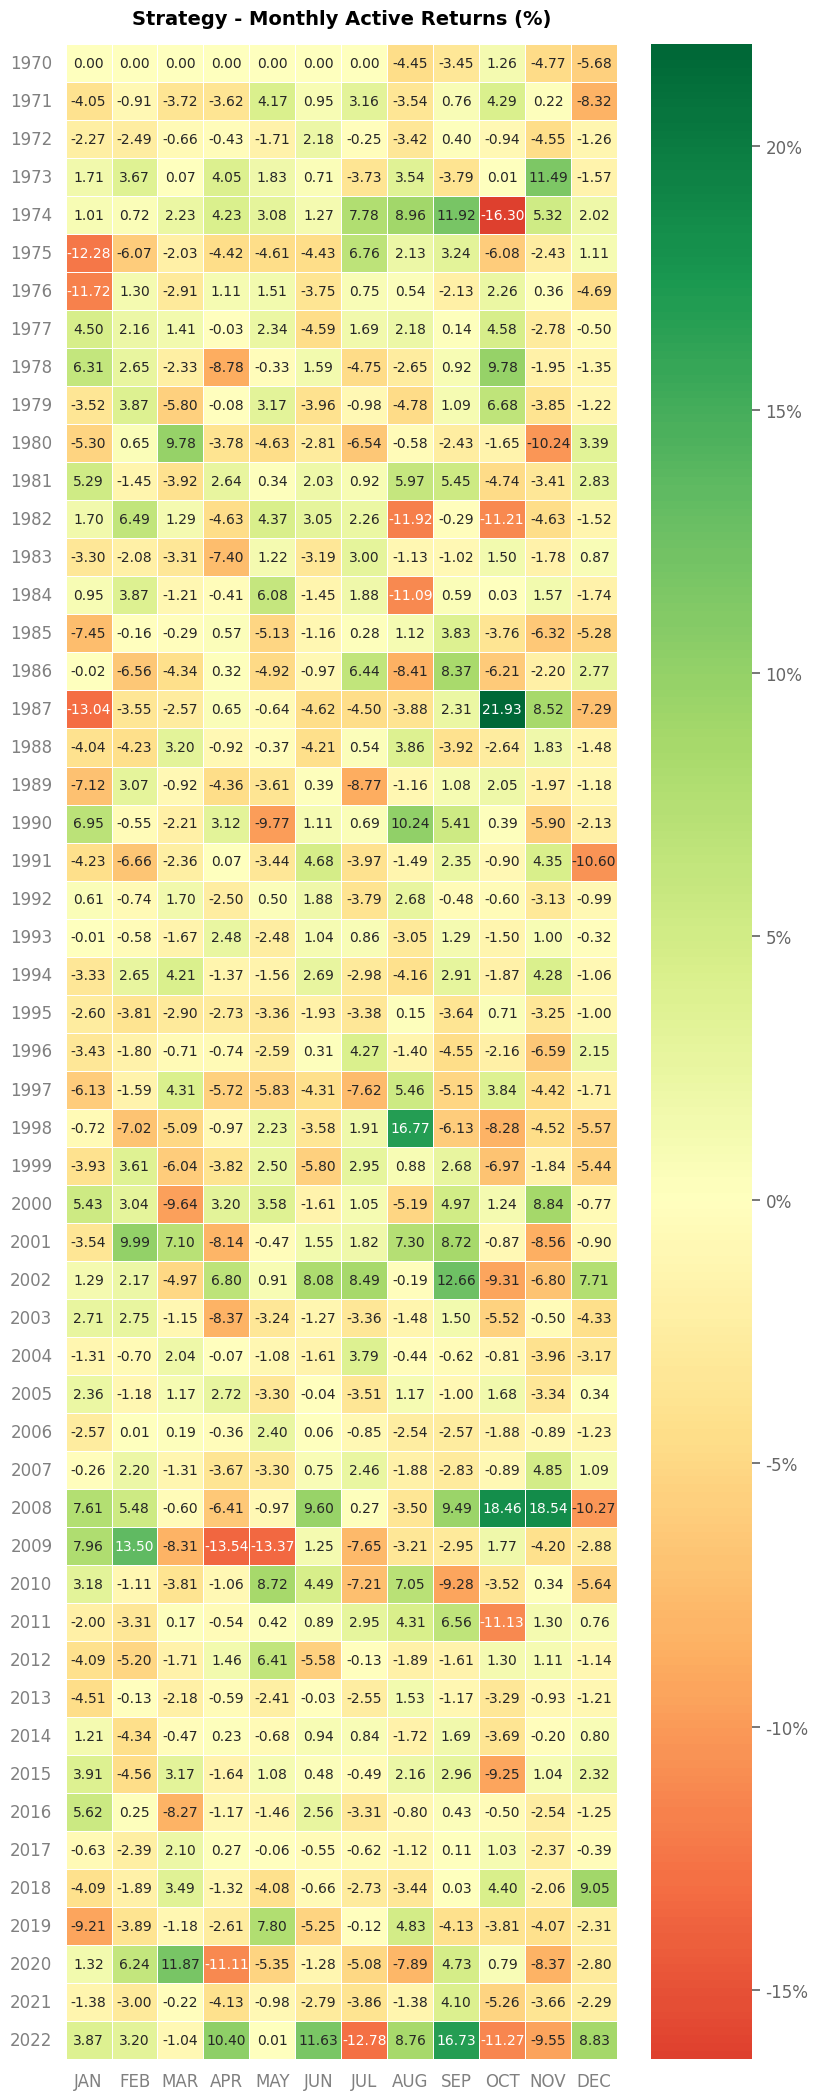

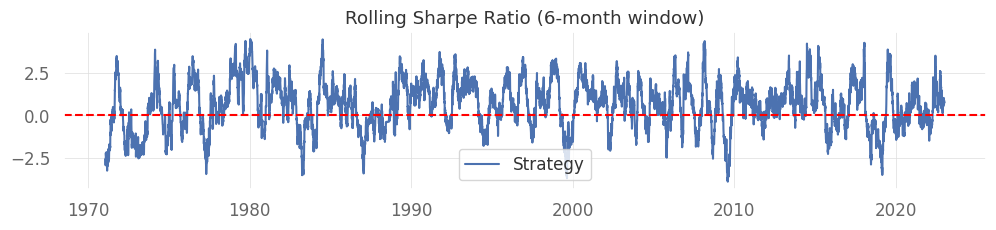

In [20]:
from almanac.strategy.strategy8 import Strategy8
from almanac.config.instruments import INSTRUMENT_LIST, instrument_weights, multipliers, cost_per_contract_dict
capital = 500000
idm = 1
risk_target = 0.2

strat = Strategy8(data_path='../sample_data/jumbo/',
                  fx_path='../sample_data/fx_data/',
                  instrument_list=INSTRUMENT_LIST,
                  instrument_weights=instrument_weights,
                  multipliers=multipliers,
                  idm=idm, risk_target=risk_target, capital=capital,
                  cost_per_contract_dict=cost_per_contract_dict,
                  get_carry=False
                  )
strat8_positions = strat.run_strategy(show_stats=False, return_positions=True)

optimizer = Strategy25(
    data_path="../sample_data/jumbo/",
    carry_path="../sample_data/jumbo_carry/",
    fx_path="../sample_data/fx_data/",
    instrument_list=INSTRUMENT_LIST,
    instrument_weights=instrument_weights,
    multipliers=multipliers,
    idm=idm,
    risk_target=risk_target,
    capital=capital,
    cost_per_contract_dict=cost_per_contract_dict,
    use_buffer=False,
    get_carry=False,
    algo_to_use=greedy_algo_across_integer_values,
    unrounded_position_contracts_dict=strat8_positions,
)

optimized_positions_str8 = optimizer.run_strategy(return_position=True)

In [21]:
optimized_positions_df_str8 = pd.DataFrame(optimized_positions_str8)
non_zero_mask = (optimized_positions_df_str8 != 0).any()
columns_with_non_zero_values = optimized_positions_df_str8.columns[non_zero_mask]
print(f"Total Assets: {len(columns_with_non_zero_values)}")
columns_with_non_zero_values

Total Assets: 67


Index(['US2', 'US3', 'US5', 'US10', 'US20', 'US10U', 'SHATZ', 'BOBL', 'BUND',
       'BUXL', 'BTP', 'BTP3', 'JGB', 'BONO', 'DOW', 'NASDAQ_micro', 'R1000',
       'SP400', 'SP500_micro', 'AEX', 'DAX', 'SMI', 'DJSTX-SMALL', 'EU-DIV30',
       'EURO600', 'EUROSTX', 'EU-AUTO', 'EU-BASIC', 'EU-HEALTH', 'EU-INSURE',
       'EU-OIL', 'EU-TECH', 'EU-UTILS', 'FTSECHINAA', 'NIFTY', 'NIKKEI',
       'NIKKEI400', 'MUMMY', 'TOPIX', 'MSCISING', 'VIX', 'V2X', 'AUD', 'CAD',
       'CHF', 'EUR', 'JPY', 'NZD', 'MXP', 'RUR', 'SGD', 'ALUMINIUM', 'COPPER',
       'GOLD_micro', 'IRON', 'PALLAD', 'PLAT', 'SILVER', 'BITCOIN',
       'CRUDE_W_mini', 'GASOILINE', 'GAS_US_mini', 'HEATOIL', 'BBCOMM',
       'CHEESE', 'RICE', 'SOYMEAL'],
      dtype='object')

### Strategy 9

Calculating covariance - can take a while


/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-packages/almanac-0.0.0-py3.10.egg/almanac/dynamic_optimization/dyn_opt.py:199: RuntimeWarning: invalid value encountered in scalar power
/home/ornob/miniconda3/envs/fa3/lib/python3.10/site-pac

Portfolio Turnover: nan
[*********************100%***********************]  1 of 1 completed


                            Benchmark    Strategy
--------------------------  -----------  ----------
Start Period                1970-02-05   1970-02-05
End Period                  2022-12-30   2022-12-30
Risk-Free Rate              0.0%         0.0%
Time in Market              93.0%        94.0%

Cumulative Return           4,884.42%    80.15%
Pre-Cost Cumulative Return  -            129.31%
Active Return               0.0%         -4804.27%
CAGR﹪                      5.23%        0.77%

Post-cost Sharpe            0.5          0.33
Pre-Cost Sharpe             -            0.46
Cost in Sharpe              -            0.13
Prob. Sharpe Ratio          99.99%       99.36%
Smart Sharpe                0.43         0.29
Sortino                     0.7          0.46
Smart Sortino               0.61         0.4
Sortino/√2                  0.5          0.33
Smart Sortino/√2            0.43         0.29
Omega                       1.08         1.08

Max Drawdown                -56.78%      -1

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2018-01-23  2019-03-01  2020-03-19   787    -14.605519        -14.297325
2  2021-05-11  2022-01-24  2022-06-12   398    -11.220604        -10.828541
3  2022-09-28  2022-12-07  2022-12-30    94     -9.916349         -9.663273
4  2022-06-15  2022-08-01  2022-09-26   104     -8.812105         -8.519114
5  2015-04-29  2016-11-04  2017-04-24   727     -7.558752         -6.771368

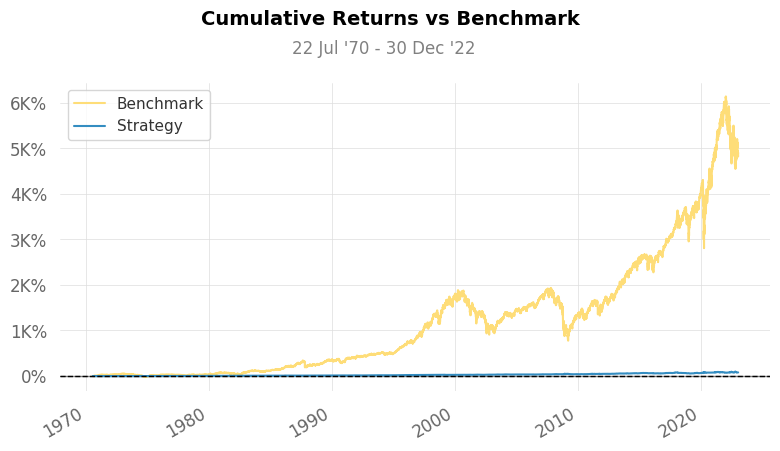

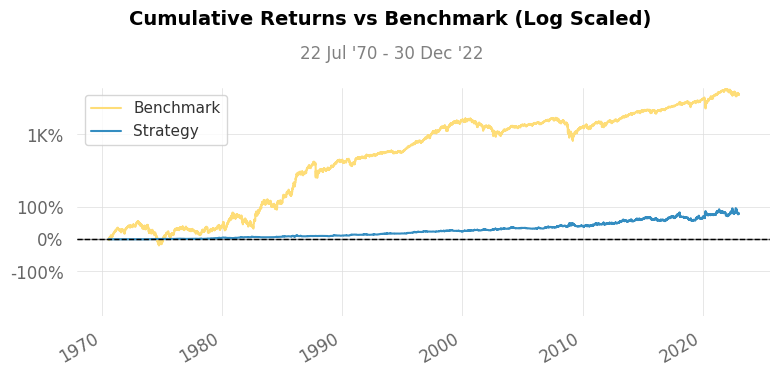

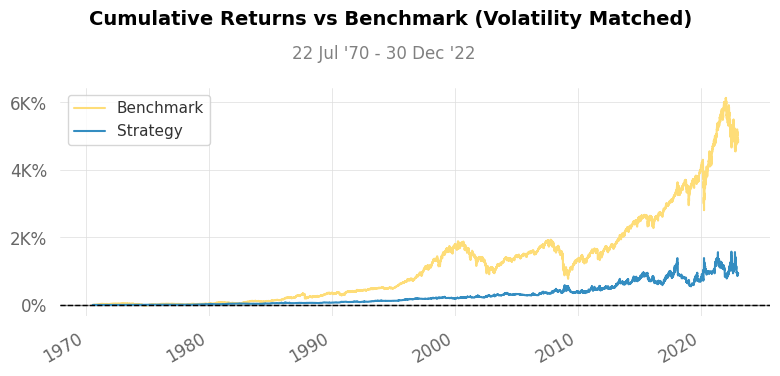

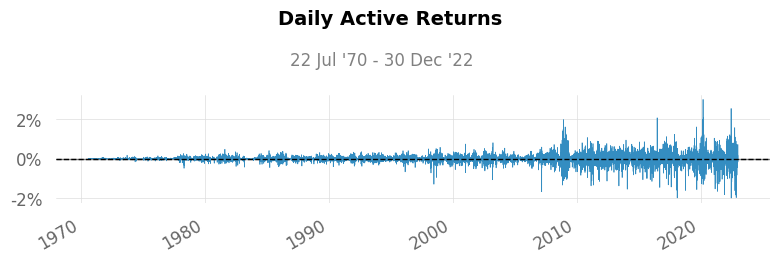

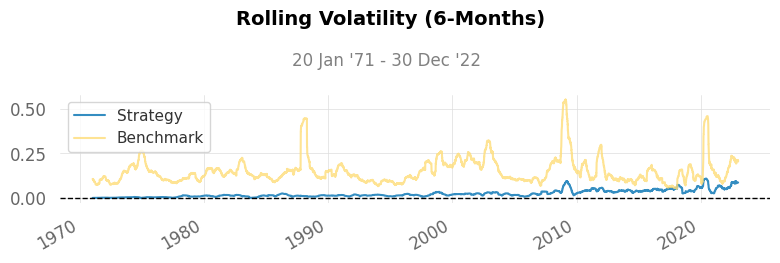

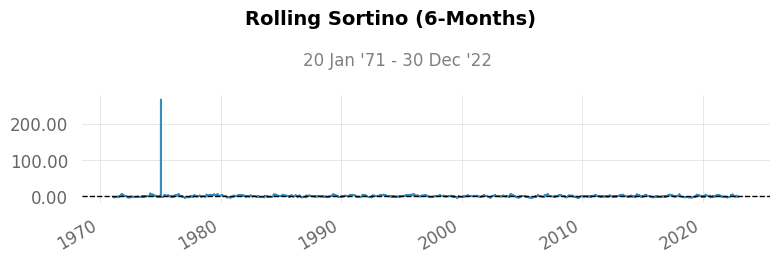

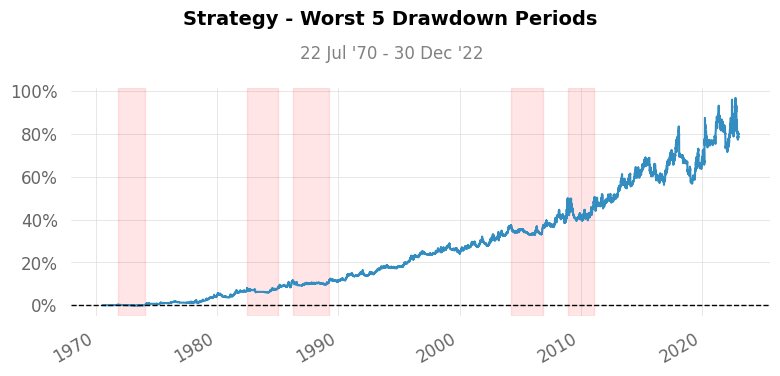

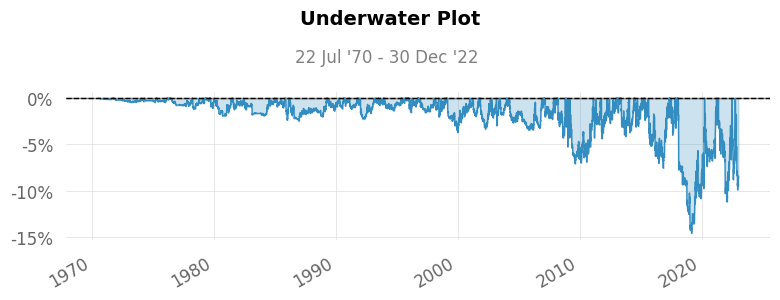

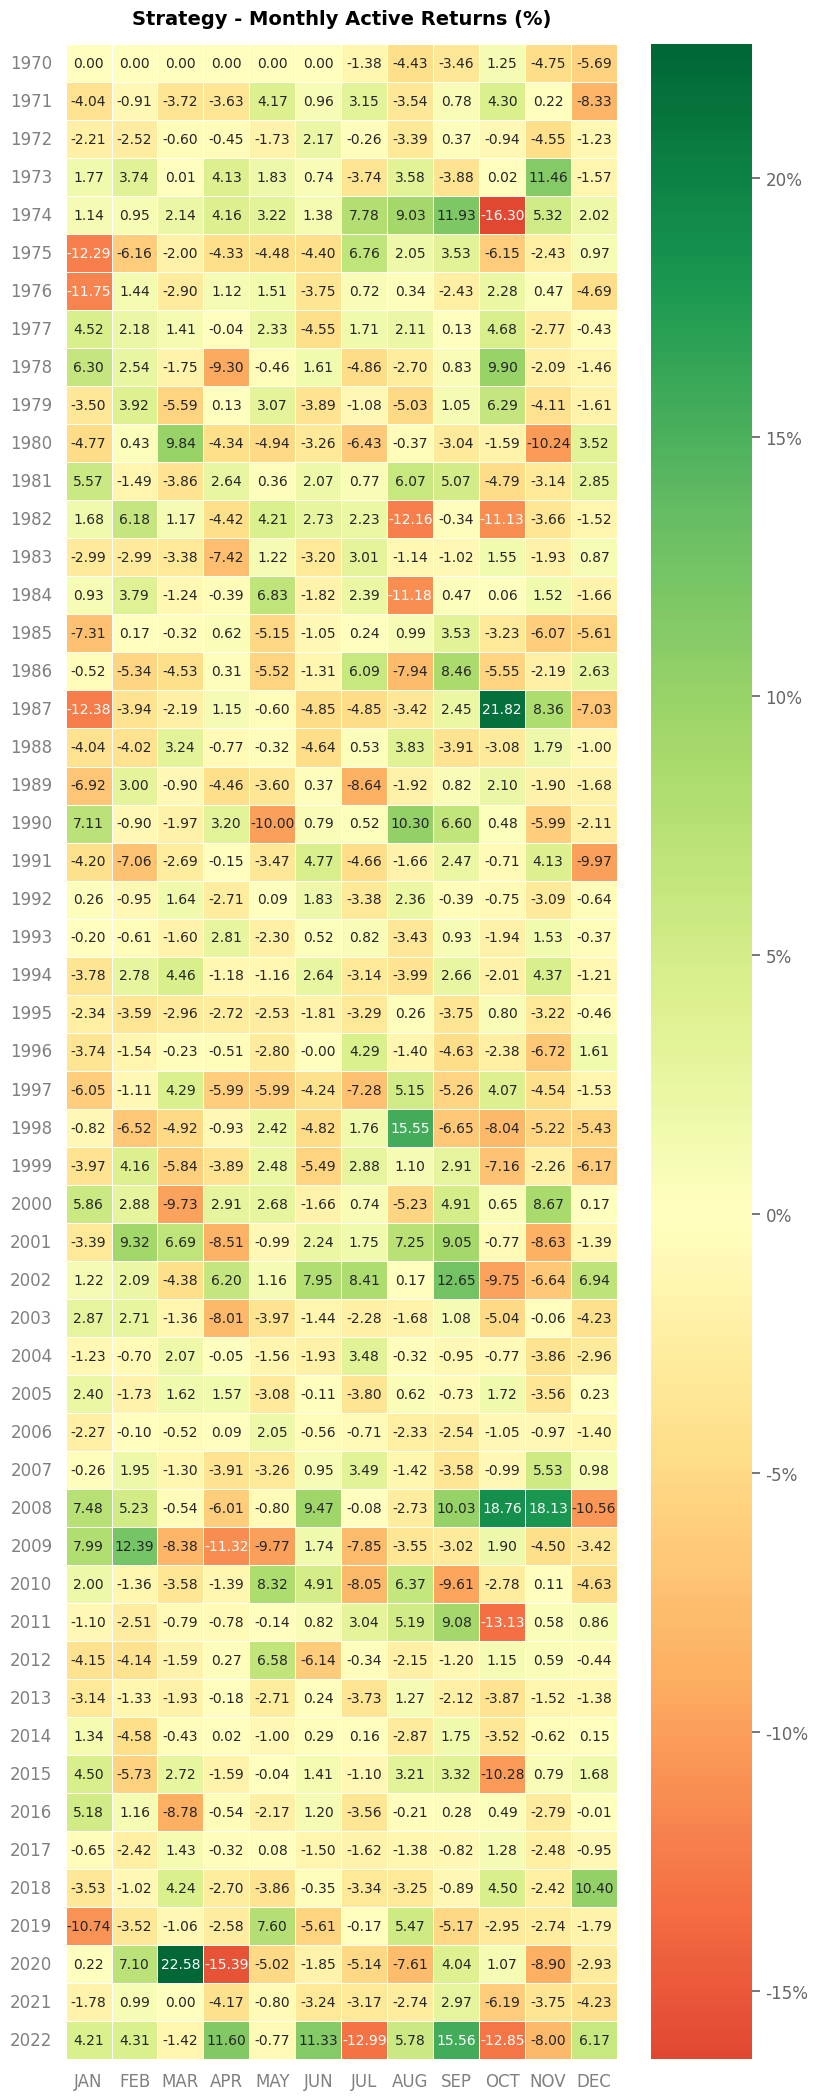

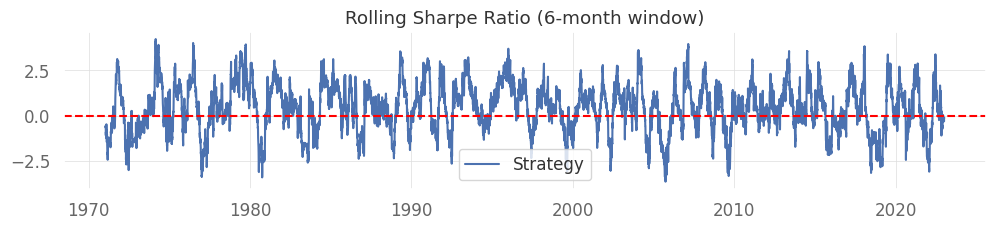

In [22]:
from almanac.strategy.strategy9 import Strategy9
from almanac.config.instruments import INSTRUMENT_LIST, instrument_weights, multipliers, cost_per_contract_dict
capital = 500000
idm = 1
risk_target = 0.2

strat = Strategy9(data_path='../sample_data/jumbo/',
                  fx_path='../sample_data/fx_data/',
                  instrument_list=INSTRUMENT_LIST,
                  instrument_weights=instrument_weights,
                  multipliers=multipliers,
                  idm=idm, risk_target=risk_target, capital=capital,
                  cost_per_contract_dict=cost_per_contract_dict,
                  get_carry=False, fast_spans=[16, 32, 64],
                  )
strat9_positions = strat.run_strategy(show_stats=False, return_positions=True)

optimizer = Strategy25(
    data_path="../sample_data/jumbo/",
    carry_path="../sample_data/jumbo_carry/",
    fx_path="../sample_data/fx_data/",
    instrument_list=INSTRUMENT_LIST,
    instrument_weights=instrument_weights,
    multipliers=multipliers,
    idm=idm,
    risk_target=risk_target,
    capital=capital,
    cost_per_contract_dict=cost_per_contract_dict,
    use_buffer=False,
    get_carry=False,
    algo_to_use=greedy_algo_across_integer_values,
    unrounded_position_contracts_dict=strat9_positions,
)

optimized_positions_str9 = optimizer.run_strategy(return_position=True)

In [23]:
optimized_positions_df_str9 = pd.DataFrame(optimized_positions_str9)
non_zero_mask = (optimized_positions_df_str9 != 0).any()
columns_with_non_zero_values = optimized_positions_df_str9.columns[non_zero_mask]
print(f"Total Assets: {len(columns_with_non_zero_values)}")
columns_with_non_zero_values

Total Assets: 70


Index(['US2', 'US3', 'US5', 'US10', 'US30', 'US20', 'US10U', 'SHATZ', 'BOBL',
       'BUND', 'BUXL', 'BTP', 'BTP3', 'JGB', 'BONO', 'DOW', 'NASDAQ_micro',
       'R1000', 'SP400', 'SP500_micro', 'AEX', 'DAX', 'SMI', 'DJSTX-SMALL',
       'EU-DIV30', 'EURO600', 'EUROSTX', 'EU-AUTO', 'EU-BASIC', 'EU-HEALTH',
       'EU-INSURE', 'EU-OIL', 'EU-TECH', 'EU-UTILS', 'FTSECHINAA',
       'FTSECHINAH', 'NIFTY', 'NIKKEI', 'NIKKEI400', 'MUMMY', 'TOPIX',
       'MSCISING', 'VIX', 'V2X', 'AUD', 'CAD', 'CHF', 'EUR', 'JPY', 'NZD',
       'SEK', 'MXP', 'RUR', 'SGD', 'ALUMINIUM', 'COPPER', 'GOLD_micro', 'IRON',
       'PALLAD', 'PLAT', 'SILVER', 'BITCOIN', 'CRUDE_W_mini', 'GASOILINE',
       'GAS_US_mini', 'HEATOIL', 'BBCOMM', 'CHEESE', 'RICE', 'SOYMEAL'],
      dtype='object')

### Strategy 10

In [24]:
from almanac.strategy.strategy10 import Strategy10
from almanac.config.instruments import INSTRUMENT_LIST, instrument_weights, multipliers, cost_per_contract_dict
capital = 500000
idm = 1
risk_target = 0.2

strat = Strategy10(data_path='../sample_data/jumbo/',
                  fx_path='../sample_data/fx_data/',
                  instrument_list=INSTRUMENT_LIST,
                  instrument_weights=instrument_weights,
                  multipliers=multipliers,
                  idm=idm, risk_target=risk_target, capital=capital,
                  cost_per_contract_dict=cost_per_contract_dict,
                  get_carry=True, carry_spans=[5, 20, 60, 120],
                  )
strat10_positions = strat.run_strategy(show_stats=False, return_positions=True)

optimizer = Strategy25(
    data_path="../sample_data/jumbo/",
    carry_path="../sample_data/jumbo_carry/",
    fx_path="../sample_data/fx_data/",
    instrument_list=INSTRUMENT_LIST,
    instrument_weights=instrument_weights,
    multipliers=multipliers,
    idm=idm,
    risk_target=risk_target,
    capital=capital,
    cost_per_contract_dict=cost_per_contract_dict,
    use_buffer=False,
    get_carry=True,
    algo_to_use=greedy_algo_across_integer_values,
    unrounded_position_contracts_dict=strat10_positions,
)

optimized_positions_str10 = optimizer.run_strategy(return_position=True)

SyntaxError: invalid syntax (2120859833.py, line 14)

In [ ]:
optimized_positions_df_str10 = pd.DataFrame(optimized_positions_str10)
non_zero_mask = (optimized_positions_df_str10 != 0).any()
columns_with_non_zero_values = optimized_positions_df_str10.columns[non_zero_mask]
print(f"Total Assets: {len(columns_with_non_zero_values)}")
columns_with_non_zero_values